Load the Similarity Matrix

In [2]:
import pandas as pd

# Load the similarity matrix we saved earlier
similarity_df = pd.read_csv("../data/resume_jd_similarity_scores.csv")

# Preview the structure
similarity_df.head(2)


,Resume Preview,Java Developer_0,Java Developer_1,Java Developer_2,DevOps Engineer_3,DevOps Engineer_4,DevOps Engineer_5,Python Developer_6,Python Developer_7,Python Developer_8,...,PMO_65,HR_66,HR_67,HR_68,Arts_69,Arts_70,Arts_71,ETL Developer_72,ETL Developer_73,ETL Developer_74
0,Skills * Programming Languages: Python (pandas...,0.3915,0.3392,0.4121,0.4429,0.4301,0.3702,0.4548,0.5501,0.5071,...,0.4064,0.4656,0.4597,0.4464,0.4310,0.4178,0.4258,0.3931,0.3987,0.3941
1,Education Details \r\nMay 2013 to May 2017 B.E...,0.3897,0.3704,0.4749,0.4441,0.4116,0.3821,0.4291,0.5720,0.5456,...,0.4325,0.4906,0.4822,0.4554,0.4822,0.4284,0.4509,0.3995,0.4126,0.3980


Convert Wide → Long Format

In [3]:
# Melt the similarity matrix to long-form: Resume, JD, Similarity Score
long_df = similarity_df.melt(id_vars='Resume Preview', 
                             var_name='JD_Role', 
                             value_name='Similarity_Score')

# Preview
long_df.head()


,Resume Preview,JD_Role,Similarity_Score
0,Skills * Programming Languages: Python (pandas...,Java Developer_0,0.3915
1,Education Details \r\nMay 2013 to May 2017 B.E...,Java Developer_0,0.3897
2,"Areas of Interest Deep Learning, Control Syste...",Java Developer_0,0.3733
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Java Developer_0,0.3952
4,"Education Details \r\n MCA YMCAUST, Faridab...",Java Developer_0,0.5317


Apply Top-K Labeling for Each JD (Smart Semi-supervised)

In [17]:
# Choose number of top resumes to shortlist per JD
TOP_K = 10

# Empty list to collect labeled data
labeled_rows = []

# Group by JD role
for jd in long_df['JD_Role'].unique():
    subset = long_df[long_df['JD_Role'] == jd].copy()

    # Sort resumes by similarity score for this JD
    subset = subset.sort_values(by='Similarity_Score', ascending=False)

    # Label top K as 1 (shortlisted), rest as 0
    subset['Label'] = [1 if i < TOP_K else 0 for i in range(len(subset))]

    labeled_rows.append(subset)

# Combine all labeled groups
labeled_df = pd.concat(labeled_rows).reset_index(drop=True)





Check Label Balance

Label Distribution:
Label
0    71400
1      750
Name: count, dtype: int64


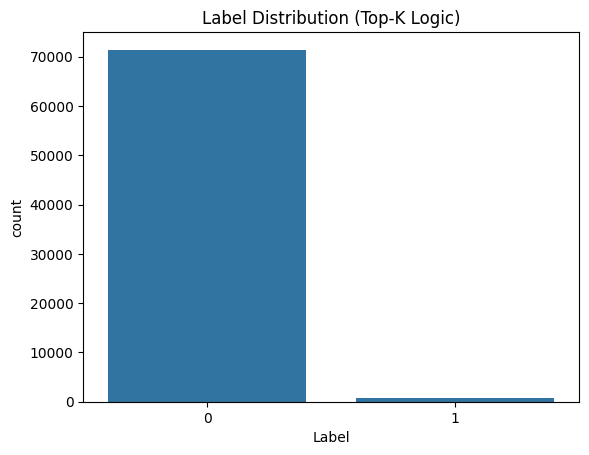

In [18]:
print("Label Distribution:")
print(labeled_df['Label'].value_counts())

# Optional: visual check
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=labeled_df)
plt.title("Label Distribution (Top-K Logic)")
plt.show()



Save Final Labeled Dataset

In [20]:
labeled_df.to_csv("../data/labeled_resume_jd_dataset.csv", index=False)
print("✅ Saved labeled dataset for modeling.")




✅ Saved labeled dataset for modeling.
